In [1]:
import SLEEPY as sl
import numpy as np

# Lab Frame with irradiation on $^{13}$C
## Square wave (2 step) irradiation

LF calculation: |██████████████████████████████| 100% complete
Completed


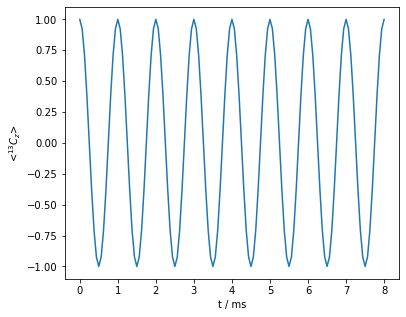

In [20]:
# First, just check the nutation frequency
ex=sl.ExpSys(v0H=600,Nucs='13C',vr=0,LF=True)

seq=ex.Liouvillian().Sequence(Dt=1/1000/16).add_channel('13C',v1=1000)

lfrf=sl.LFrf(seq,min_steps=2)
U=lfrf.U()

rho=sl.Rho('13Cz','13Cz')

rho.DetProp(U,n=129)
ax=rho.plot()
ax.figure.set_size_inches([6,5])

### Add dipole-coupled $^1$H

LF calculation: |██████████████████████████████| 100% complete
Completed


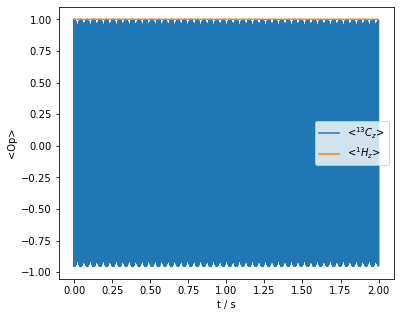

In [28]:
ex=sl.ExpSys(v0H=600,Nucs=['13C','1H'],vr=5000,LF=True,pwdavg=sl.PowderAvg(q=2)[10])
ex.set_inter('dipole',i0=0,i1=1,delta=44000)

seq=ex.Liouvillian().Sequence().add_channel('13C',v1=100000)

lfrf=sl.LFrf(seq,min_steps=2)
U=lfrf.U()

rho=sl.Rho('13Cz+1Hz',['13Cz','1Hz'])

rho.DetProp(U,n=10000)
ax=rho.plot(axis='s')
ax.figure.set_size_inches([6,5])

## $^1$H frequency exactly 4x $^{13}$C frequency

LF calculation: |██████████████████████████████| 100% complete
Completed


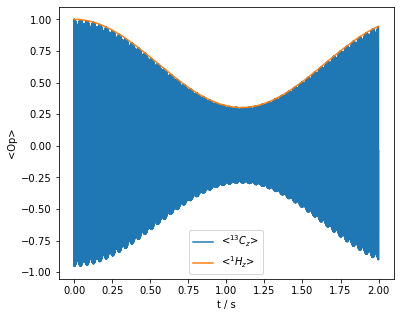

In [55]:
ex=sl.ExpSys(v0H=600,Nucs=['13C','1H'],vr=5000,LF=True,pwdavg=sl.PowderAvg(q=2)[10])
ex._v0=np.array([ex.v0[0],ex.v0[0]*4])  #Set 1H to be exactly 4x the 13C frequency
ex.set_inter('dipole',i0=0,i1=1,delta=44000)

seq=ex.Liouvillian().Sequence().add_channel('13C',v1=100000)

lfrf=sl.LFrf(seq,min_steps=2)
U=lfrf.U()

rho=sl.Rho('13Cz+1Hz',['13Cz','1Hz'])

rho.DetProp(U,n=10000)
ax=rho.plot(axis='s')
ax.figure.set_size_inches([6,5])

## $^1$H frequency exactly 4x $^{13}$C frequency, 8 steps

LF calculation: |██████████████████████████████| 100% complete
Completed


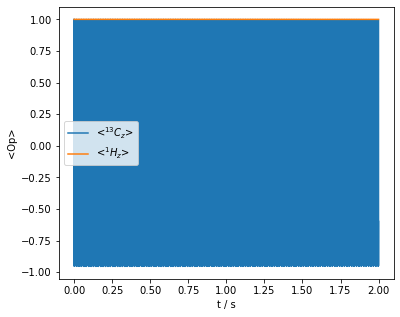

In [26]:
ex=sl.ExpSys(v0H=600,Nucs=['13C','1H'],vr=5000,LF=True,pwdavg=sl.PowderAvg(q=2)[10])
ex._v0=np.array([ex.v0[0],ex.v0[0]*4])  #Set 1H to be exactly 4x the 13C frequency
ex.set_inter('dipole',i0=0,i1=1,delta=44000)

seq=ex.Liouvillian().Sequence().add_channel('13C',v1=100000)

lfrf=sl.LFrf(seq,min_steps=8)
U=lfrf.U()

rho=sl.Rho('13Cz+1Hz',['13Cz','1Hz'])

rho.DetProp(U,n=10000)
ax=rho.plot(axis='s')
ax.figure.set_size_inches([6,5])

## Normal frequencies, but with some $T_2$ broadening

LF calculation: |██████████████████████████████| 100% complete
Completed


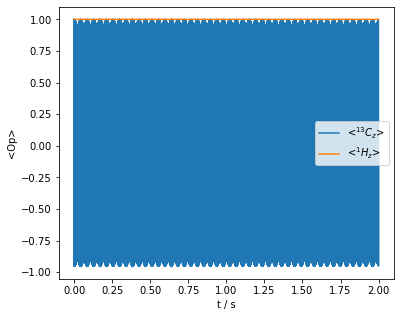

In [36]:
ex=sl.ExpSys(v0H=600,Nucs=['13C','1H'],vr=5000,LF=True,pwdavg=sl.PowderAvg(q=2)[10])
ex.set_inter('dipole',i0=0,i1=1,delta=44000)

L=ex.Liouvillian()
L.add_relax('T2',i=1,T2=.001)
seq=L.Sequence().add_channel('13C',v1=100000)

lfrf=sl.LFrf(seq,min_steps=2)
U=lfrf.U()

rho=sl.Rho('13Cz+1Hz',['13Cz','1Hz'])

rho.DetProp(U,n=10000)
ax=rho.plot(axis='s')
ax.figure.set_size_inches([6,5])